In [1]:
# importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

In [2]:
# defining the path of Cifar10 folder and the categories to distinct variables

_DATA_SET = r"C:\Users\User\OneDrive - American International University-Bangladesh\aiub\9th Semester\CVPR\Cifar10"
_CATEGORIES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# train label from the csv file

# import csv
# _TRAIN_LABELS = []
# _DATA = []
# csv_file = os.path.join(_DATA_SET, "trainlabels.csv")
# with open(csv_file, 'r') as file:
#     reader = csv.reader(file)
#     _DATA = list(reader)
        
# _DATA.pop(0)

# for i in range(len(_DATA)):
#     count = 0
#     for j in _DATA[i]:
#         if count == 1:
#             _TRAIN_LABELS.append(j)
#         count += 1
            
# print(len(_TRAIN_LABELS))
# print(_TRAIN_LABELS[0:10])

In [4]:
import csv
_TRAIN_LABELS = []
csv_file = os.path.join(_DATA_SET, "trainlabels.csv")
    
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        _TRAIN_LABELS.append(row)
        
_TRAIN_LABELS.pop(0)
print(len(_TRAIN_LABELS))
print(_TRAIN_LABELS[0:10])


50000
[['1', 'frog'], ['2', 'truck'], ['3', 'truck'], ['4', 'deer'], ['5', 'automobile'], ['6', 'automobile'], ['7', 'bird'], ['8', 'horse'], ['9', 'ship'], ['10', 'cat']]


In [6]:
# training the images (50,000 images) from train folder

_TRAIN_IMGS = []
_IMG_SIZE = 100



for c in _CATEGORIES:
    
    path = os.path.join(_DATA_SET, "train")
    images = os.listdir(path)
    images.sort(key = len)
    class_name = _CATEGORIES.index(c)
    
    for img in tqdm(images):
        
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img_arr, (_IMG_SIZE, _IMG_SIZE))
            _TRAIN_IMGS.append([img_resized, class_name])
        
        except Exception as e:
            pass

100%|██████████| 50000/50000 [01:40<00:00, 499.31it/s]


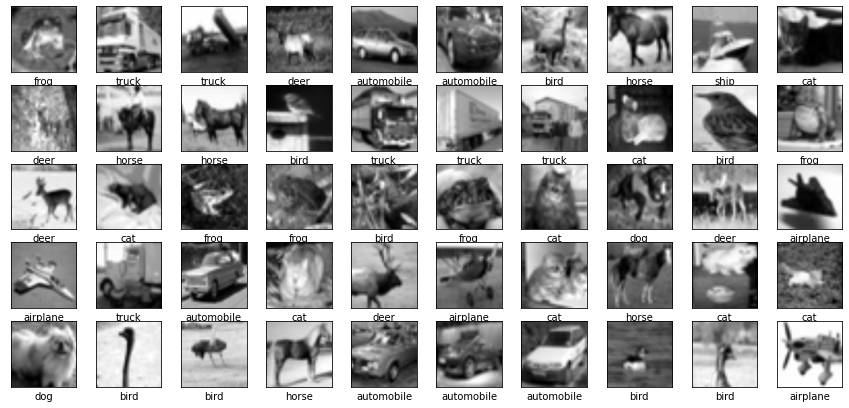

In [7]:
plt.figure(figsize=(15,7))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.imshow(_TRAIN_IMGS[i][0], cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(_TRAIN_LABELS[i][1])
    
plt.show()

In [8]:
X = []
y = []

for f,l in _TRAIN_IMGS:
    X.append(f)
    y.append(l)

In [9]:
print(X[0].shape)
tmp = X[0].reshape(-1, _IMG_SIZE, _IMG_SIZE, 1)
print(tmp.shape)

(100, 100)
(1, 100, 100, 1)


In [10]:
X = np.array(X).reshape(-1, _IMG_SIZE, _IMG_SIZE, 1)
print(X.shape)

(500000, 100, 100, 1)


In [11]:
pout = open("X.pickle","wb")
pickle.dump(X, pout)
pout.close()

MemoryError: 

In [13]:
pout = open("y.pickle","wb")
pickle.dump(y, pout)
pout.close()